Title: Hand Written Digit Prediction - Classification Analysis


Objective : This code provides a comprehensive implementation for a handwritten digit classification project using the MNIST dataset.

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Import Data

In [3]:
digits = load_digits()


Describe Data

In [4]:
print(f"Data shape: {digits.data.shape}")
print(f"Target classes: {np.unique(digits.target)}")
print("Description:")
print(digits.DESCR)

Data shape: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]
Description:
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 a

Data Visualization

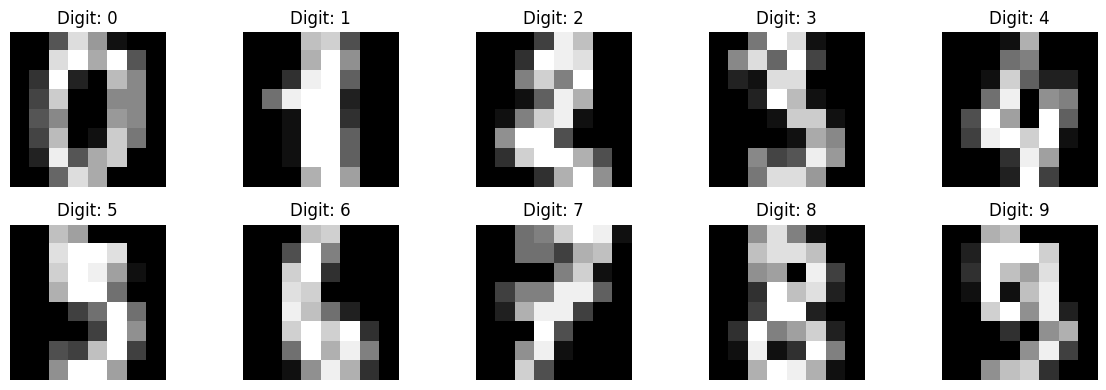

In [5]:
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Digit: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Data Preprocessing


In [6]:
data = digits.data / 16.0

In [7]:
X = data
y = digits.target

Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modeling

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation


In [10]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.22%


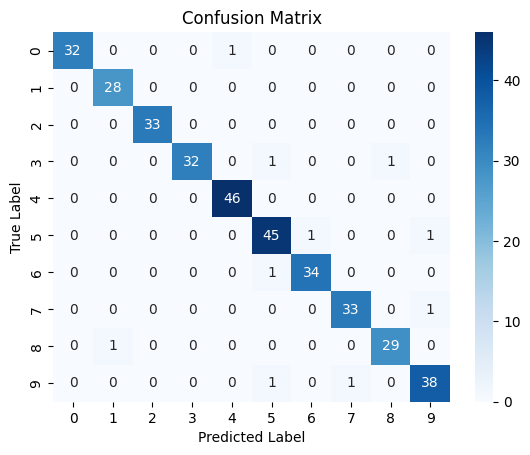

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



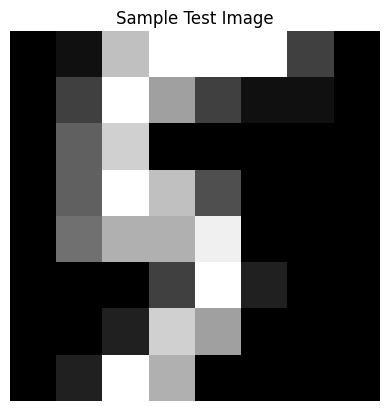

In [13]:
sample_index = 8
sample_image = X_test[sample_index].reshape(8, 8)
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Test Image")
plt.axis('off')
plt.show()


In [14]:
predicted_digit = clf.predict([X_test[sample_index]])[0]
print(f"Predicted Digit: {predicted_digit}")


Predicted Digit: 5


Explanation : This model uses Random Forest for classification, providing an interpretable way to predict handwritten digits.
Features represent pixel intensities scaled to [0, 1].
Data visualization confirms correctness of the labels.
The confusion matrix and classification report help assess misclassification trends and overall performance.